### Семинар 10: ROC-анализ в бинарной классификации.

In [1]:
import pandas as pd
import numpy  as np
import matplotlib
import matplotlib.pyplot as plt

Загрузим датасет breast_cancer:

In [82]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

Разобъём на обучающую и тестовую выборки:

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=True)

Построим модель логистической регрессии и обучим:

In [85]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver="liblinear")
model_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Сделаем предсказание:

In [86]:
y_pred_lr = model_lr.predict(X_test)

Найдём метрику _accuracy_ (_точность_):

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)

0.8771929824561403

Также сделаем предсказание на тренировочном датасете и посчитаем точность на нём:

In [88]:
y_pred_lr_train = model_lr.predict(X_train)
accuracy_score(y_train, y_pred_lr_train)

0.9120879120879121

Точность на тренировочной и обучающей выборках примерно одинаковая. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.

Aлгоритм логистической регрессии позволяет получить не только предсказанную метку класса, но и вероятность принадлежности этому классу. Эти вероятности можно получить с помощью метода `.predict_proba`:

In [89]:
y_pred_lr_proba = model_lr.predict_proba(X_test)

y_pred_lr_proba[:10]

array([[0.4062823 , 0.5937177 ],
       [0.16196991, 0.83803009],
       [0.04594981, 0.95405019],
       [0.98257199, 0.01742801],
       [0.80858678, 0.19141322],
       [0.89951745, 0.10048255],
       [0.99810982, 0.00189018],
       [0.99037996, 0.00962004],
       [0.02460816, 0.97539184],
       [0.12128428, 0.87871572]])

В первом столбце полученного массива стоит вероятность каждого объекта принадлежать классу 0, а во втором - вероятность принадлежать классу 1. Можно заметить, что сумма значений каждой строки равна 1.

Возьмём вероятности только для класса 1:

In [90]:
probs_lr = y_pred_lr_proba[:, 1]

Рассчитаем ROC-кривую:

In [91]:
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.metrics import roc_auc_score # тоже, что auc
from matplotlib import pyplot as plt

In [92]:
fpr_lr, tpr_lr, treshold_lr = roc_curve(y_test, probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lr

0.9632936507936508

Построим модель к-ближайших соседей и обучим, сделаем предсказание и найдём вероятности положительного класса:

In [96]:
from sklearn.neighbors import KNeighborsClassifier
model_k = KNeighborsClassifier(n_neighbors=3)
model_k.fit(X_train, y_train)
y_pred_k = model_k.predict(X_test)
y_pred_k_proba = model_k.predict_proba(X_test)
probs_k = y_pred_k_proba[:, 1]

Рассчитаем ROC-кривую:

In [97]:
fpr_k, tpr_k, treshold_k = roc_curve(y_test, probs_k)
roc_auc_k = auc(fpr_k, tpr_k)
roc_auc_k

0.8779761904761905

Построим ROC-кривые:

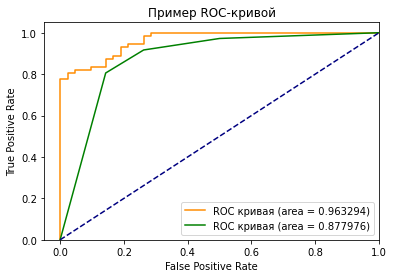

In [98]:
plt.plot(fpr_lr, tpr_lr, color='darkorange',
         label='ROC кривая (area = %0.6f)' % roc_auc_lr)
plt.plot(fpr_k, tpr_k, color='green',
         label='ROC кривая (area = %0.6f)' % roc_auc_k)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

Модель логистической регрессии здесь предпочтительнее.